In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Data/NS/US_largest500_airportnetwork.txt" ,sep='   |  ',header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()
# data.tail()
# data.drop([2],inplace=True)

,0,1,2
0,0,110,68150
1,0,48,110902
2,0,282,72020
3,0,176,220192
4,0,71,164951


In [ ]:
print(max(list(data[0])),min(list(data[0])),max(list(data[1])),min(list(data[1])))

496 0 499 1


In [ ]:
n=max(list(data[0])+list(data[1]))+1
print(n)
print(len(data))

500
2980


## Q1.: (a) Network represantation in terms of its ‘adjacency matrix’ as well as ‘edge list'.


In [ ]:
adj_matrix=np.array([[0 for x in range(n)] for y in range(n)])

In [ ]:
# print(adj_matrix)

In [ ]:
# k=0
edge_list=[]
edge_list_dict={}
for i in range(n):
  edge_list_dict[i]=[]
for i in range(len(data[0])):
  edge_list.append([data[0].iloc[i],data[1].iloc[i]])
  adj_matrix[data[0].iloc[i]][data[1].iloc[i]]=1
  edge_list_dict[data[0].iloc[i]].append(data[1].iloc[i])
# edge_list.sort()
print(edge_list)
print(edge_list_dict)


[[0, 110], [0, 48], [0, 282], [0, 176], [0, 71], [0, 55], [0, 47], [0, 136], [0, 151], [0, 50], [0, 67], [0, 155], [0, 40], [0, 19], [0, 302], [0, 122], [0, 61], [0, 21], [0, 100], [0, 118], [0, 138], [0, 157], [0, 89], [0, 37], [0, 11], [0, 46], [0, 81], [0, 120], [0, 128], [0, 206], [0, 17], [0, 172], [0, 45], [0, 78], [0, 25], [0, 5], [0, 2], [0, 235], [0, 85], [0, 7], [0, 181], [0, 63], [0, 149], [0, 16], [0, 143], [0, 183], [0, 30], [0, 225], [0, 126], [0, 127], [0, 202], [0, 133], [0, 84], [0, 76], [0, 87], [0, 223], [0, 38], [0, 95], [0, 106], [0, 239], [0, 27], [0, 10], [0, 91], [0, 154], [0, 44], [0, 83], [0, 174], [0, 92], [0, 54], [0, 28], [0, 8], [0, 3], [0, 102], [0, 15], [0, 77], [0, 398], [0, 228], [0, 32], [0, 260], [0, 18], [0, 93], [0, 23], [0, 275], [0, 36], [0, 161], [0, 70], [0, 29], [0, 51], [0, 173], [0, 115], [0, 189], [0, 130], [0, 6], [0, 39], [0, 103], [0, 34], [0, 68], [0, 65], [0, 52], [0, 1], [0, 64], [0, 230], [0, 56], [0, 33], [0, 179], [0, 139], [0, 14]

In [ ]:
print(adj_matrix)

[[0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## (b) Network visualization.

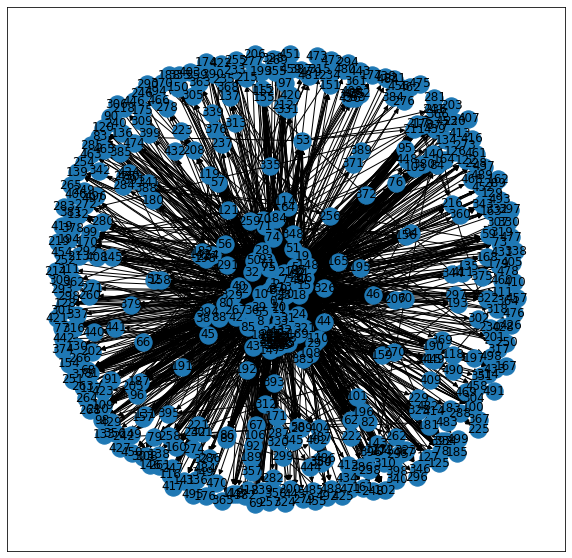

In [ ]:
G = nx.DiGraph()
G.add_edges_from(edge_list) 
plt.figure(figsize=(10,10))
nx.draw_networkx(G, with_labels=True)
plt.show()

### Q1.(c) Comment on sparseness:
possible max no of edges=(nodes*(nodes-1)/2)=(500*(500-1)/2)=124750

Available no of edges=len(edge_list)=2980

As we can see available no of edges are very less than max no of possible edges so this graph is highly sparse.

In [ ]:
print("Possible max no of edges:",n*(n-1)/2)
print("Available no of edges",len(edge_list))


Possible max no of edges: 124750.0
Available no of edges 2980


### (d) Average degree < 𝑘 >. 

In [ ]:
# print(degree)
adj_matrix_df=pd.DataFrame(adj_matrix)

# adj_matrix_df.iloc[0]
# adj_matrix_df[0]
degree=[0 for x in range(n)]
for x in range(n):
  degree[x]=len(edge_list_dict[x])
  degree[x]=sum(adj_matrix_df.iloc[x])+sum(adj_matrix_df[x])
print(degree)
print("Average degree:", sum(degree)/len(degree))
# print(max(degree[200:300]))


[145, 136, 132, 76, 91, 122, 130, 114, 74, 98, 109, 94, 62, 75, 89, 67, 85, 114, 72, 68, 110, 70, 67, 61, 59, 64, 42, 75, 44, 42, 46, 28, 67, 46, 35, 34, 84, 66, 30, 40, 53, 42, 26, 29, 40, 14, 34, 30, 40, 29, 33, 53, 21, 27, 30, 34, 24, 17, 16, 11, 30, 28, 30, 18, 24, 21, 19, 26, 22, 17, 20, 35, 24, 18, 14, 22, 18, 18, 22, 4, 23, 16, 9, 15, 16, 19, 12, 18, 16, 15, 17, 12, 11, 16, 15, 21, 11, 9, 12, 14, 15, 4, 14, 13, 8, 11, 11, 9, 12, 15, 15, 11, 10, 7, 11, 10, 9, 8, 8, 8, 4, 19, 7, 7, 9, 7, 9, 9, 12, 6, 5, 10, 7, 5, 4, 7, 6, 7, 5, 7, 14, 5, 8, 7, 7, 9, 6, 8, 9, 7, 4, 5, 8, 4, 2, 8, 9, 8, 11, 7, 5, 4, 2, 5, 5, 7, 3, 6, 3, 14, 8, 5, 6, 5, 7, 3, 4, 5, 11, 6, 4, 13, 6, 2, 14, 3, 4, 11, 2, 7, 6, 6, 13, 5, 7, 10, 5, 3, 4, 4, 3, 2, 2, 3, 4, 7, 2, 3, 4, 5, 7, 5, 6, 6, 3, 1, 8, 9, 2, 3, 4, 2, 3, 4, 4, 2, 5, 7, 4, 4, 6, 2, 2, 6, 2, 1, 1, 4, 4, 3, 2, 14, 5, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 48, 1, 1, 3, 2, 2, 3, 2, 1, 3, 3, 3, 2, 2, 4, 1, 5, 4, 2, 1, 5, 2, 4, 1, 1, 2, 2, 2, 2, 1, 2, 2, 3, 3, 5, 1, 

###Q1(e). ‘Scaled degree distribution’, 𝑝𝑘 × 𝑘. plot.

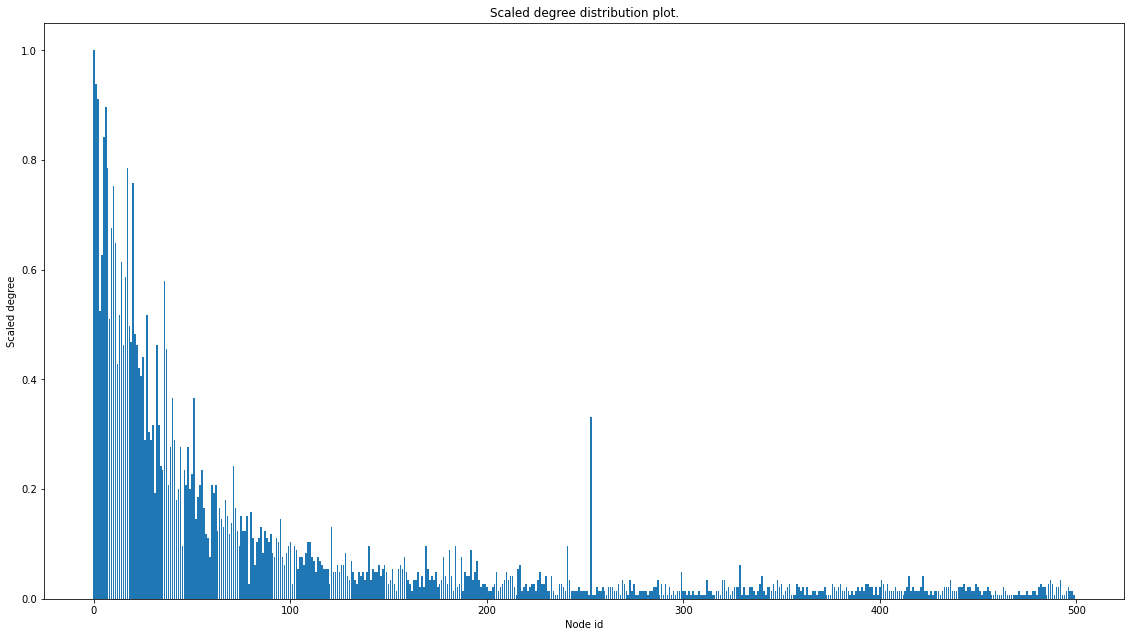

In [ ]:
scaled_degree=np.array(degree)/max(degree)
# print(scaled_degree)
# print(max(degree))
# print(max(scaled_degree[200:300]))


fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title( 'Scaled degree distribution plot.')

ax.set_xlabel('Node id')
ax.set_ylabel('Scaled degree')
ax.bar([x for x in range(n)],scaled_degree)

plt.show()


### Q2.Python script for computing in/out-degree for directed graphs.


In [ ]:
out_degree=[]
in_degree=[]
for i in range(n):
  out_degree.append(sum(adj_matrix_df.loc[i]))
  in_degree.append(sum(adj_matrix_df[i]))

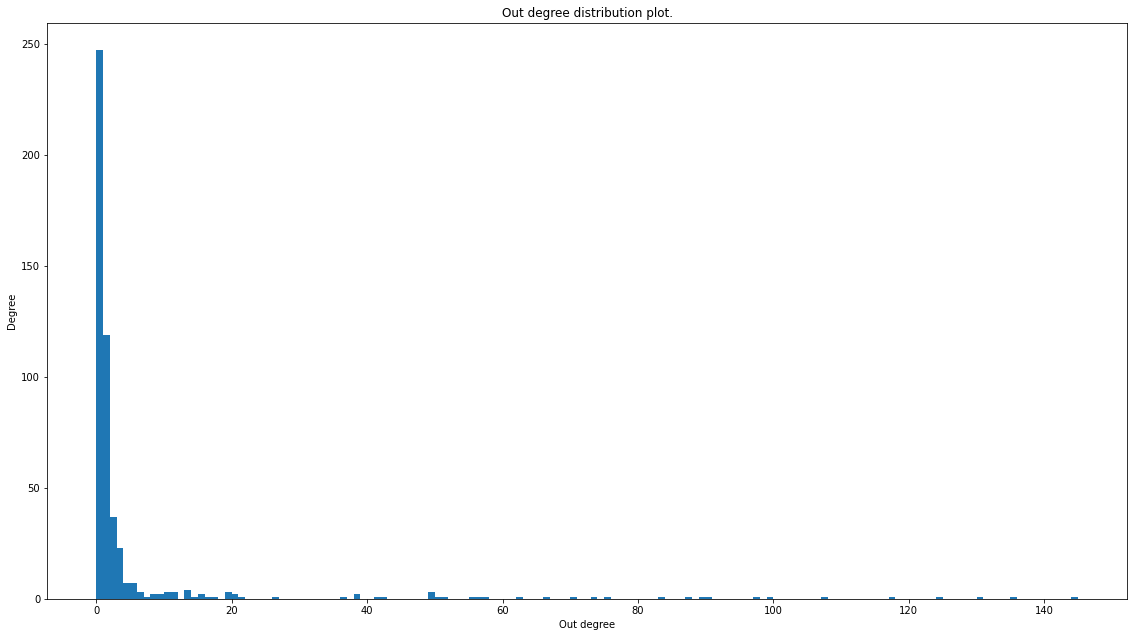

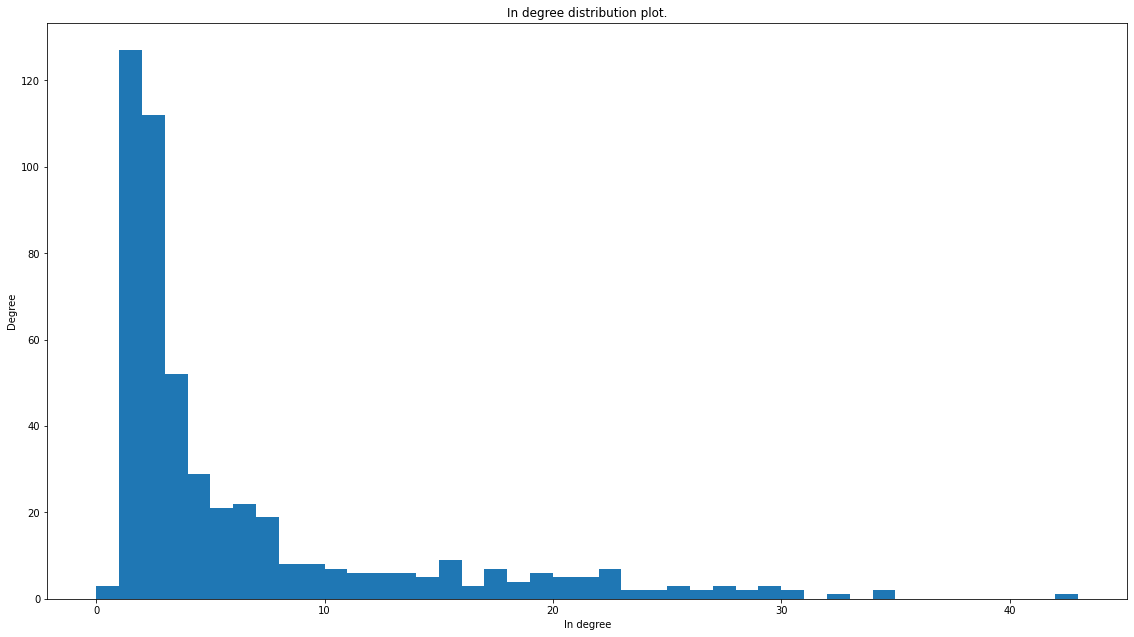

In [ ]:
# print("Out degree distribution:",out_degree)
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title( 'Out degree distribution plot.')

ax.set_xlabel('Out degree')
ax.set_ylabel('Degree')
plt.hist(adj_matrix.sum(axis=1),bins=int(max(adj_matrix.sum(axis=1))))

plt.show()
# print("In degree distribution:",in_degree)
# fig = plt.figure(figsize=(15,8))

fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title( 'In degree distribution plot.')
ax.set_xlabel('In degree')
ax.set_ylabel('Degree')
# ax.bar([x for x in range(n)],in_degree)
fig=plt.hist(adj_matrix.sum(axis=0),bins=int(max(adj_matrix.sum(axis=0))))

plt.show()


### Q3.
Notion of ‘degree’ and ‘clustering coefficient’ for a weighted network to account for the edge weights:

In [ ]:
adj_matrix_und=np.array([[0 for x in range(n)] for y in range(n)])
for i in range(len(data[0])):
  adj_matrix_und[data[0].iloc[i]][data[1].iloc[i]]=data[2].iloc[i]
  adj_matrix_und[data[1].iloc[i]][data[0].iloc[i]]=data[2].iloc[i]
      

In [ ]:
# weighted_degree
# weighted_degree=np.sum(adj_matrix_und,axis=1)
# print("Weighted degree distribution:",in_degree)
# fig = plt.figure(figsize=(15,8))
# ax = fig.add_axes([0,0,1,1])
# ax.set_title( 'Weighted degree distribution plot.')

# ax.set_xlabel('Node id')
# ax.set_ylabel('Weighted degree')
# ax.bar([x for x in range(n)],weighted_degree)

# plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title( 'Weighted degree distribution plot.')
ax.set_xlabel('Weighted degree')
ax.set_ylabel('Degree')
# ax.bar([x for x in range(n)],in_degree)
fig=plt.hist(adj_matrix_und.sum(axis=0),bins=int(max(adj_matrix_und.sum(axis=0))))
plt.show()